In [ ]:
# Update git annex version that is compatible with datalad
!wget -O- http://neuro.debian.net/lists/bionic.us-nh.full | tee /etc/apt/sources.list.d/neurodebian.sources.list \
 && export GNUPGHOME="$(mktemp -d)" \
 && echo "disable-ipv6" >> ${GNUPGHOME}/dirmngr.conf \
 && (apt-key adv --homedir $GNUPGHOME --recv-keys --keyserver hkp://pgpkeys.eu 0xA5D32F012649A5A9 \
|| { curl -sSL http://neuro.debian.net/_static/neuro.debian.net.asc | apt-key add -; } ) \
 && apt-get update \
 && apt-get install git-annex-standalone git
!git config --global user.name "mo"
!git config --global user.email "myatmo@outlook.com"
# Install datalad
!pip install datalad

# Install U-Net dependencies
!pip install fpdf
!pip install h5py==2.10

# Install scikit 0.19.2
!pip install scikit-image==0.19.2


--2022-09-15 16:36:51--  http://neuro.debian.net/lists/bionic.us-nh.full
Resolving neuro.debian.net (neuro.debian.net)... 129.170.233.11
Connecting to neuro.debian.net (neuro.debian.net)|129.170.233.11|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 262
Saving to: ‘STDOUT’

deb http://neuro.debian.net/debian data main contrib non-free
#deb-src http://neuro.debian.net/debian data main contrib non-free
deb http://neuro.debian.net/debian bionic main contrib non-free
#deb-src http://neuro.debian.net/debian bionic main contrib non-free
-                   100%[===================>]     262  --.-KB/s    in 0s      

2022-09-15 16:36:52 (46.5 MB/s) - written to stdout [262/262]

Executing: /tmp/apt-key-gpghome.nZaPdVRkSW/gpg.1.sh --homedir /tmp/tmp.rlBhltwoB2 --recv-keys --keyserver hkp://pgpkeys.eu 0xA5D32F012649A5A9
gpg: key A5D32F012649A5A9: public key "NeuroDebian Archive Key <pkg-exppsy-maintainers@lists.alioth.debian.org>" imported
gpg: Total number processed: 1

In [ ]:
# Mounting google drive to access images
from google.colab import drive
drive.mount('/content/drive')

# Load the (desired) directory
%cd drive/MyDrive/Colab Notebooks/UMII/Zooniverse


Mounted at /content/drive
/content/drive/.shortcut-targets-by-id/1zwhXN2mfYzx7J-oIj8AGfpVnPk4Dvrr5/Colab Notebooks/UMII/Zooniverse


In [ ]:
%cd umii-fatchecker-dataset

/content/drive/.shortcut-targets-by-id/1zwhXN2mfYzx7J-oIj8AGfpVnPk4Dvrr5/Colab Notebooks/UMII/Zooniverse/umii-fatchecker-dataset


# Importing Libraries

In [ ]:
#import datalad.api as dl
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import os
import sys
import glob
import math
import pandas as pd
import cv2
import skimage
import skimage.io as io
import skimage.transform as trans

: 

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_datasets as tfds


In [ ]:
ds_path = '../../../../shared/umii-fatchecker-dataset'
ds = dl.Dataset(ds_path)
# get all the file path name
image_file_list = glob.glob(os.path.join(ds_path, 'images') + '/*jpg')
mask_file_list = glob.glob(os.path.join(ds_path, 'masks') + '/*png')

# sort the file name
image_file_list.sort()
mask_file_list.sort()

print("number of images: ", len(image_file_list))
print("number of masked images: ", len(mask_file_list))

number of images:  2341
number of masked images:  2341


In [ ]:
math.floor(len(image_file_list)*0.3)

702

In [ ]:
652 / len(image_file_list)

0.27851345578812475

In [ ]:
# the split is hard-coded here
split1 = 652
split2 = len(image_file_list)

training_images = image_file_list[split1:]
training_masks = mask_file_list[split1:]
training_set = {'images': training_images,
                'masks': training_masks}

test_images = image_file_list[0:split1]
test_masks = mask_file_list[0:split1]
test_set = {'images': test_images,
                  'masks': test_masks}

In [ ]:
print(len(training_set['images']), 
len(training_set['masks']) )

print(len(test_set['images']), 
len(test_set['masks']) )

1689 1689
652 652


In [ ]:
img = mpimg.imread(training_set['images'][1629])
img.shape

(1200, 1200, 3)

In [ ]:
mask = mpimg.imread(training_set['masks'][1629])
mask.shape

(1200, 1200)

In [ ]:
t1 = mpimg.imread(test_set['images'][691])
t1.shape

(1200, 1200, 3)

# Converting to Dataframe

In [ ]:
train_df = pd.DataFrame(training_set)
test_df = pd.DataFrame(test_set)

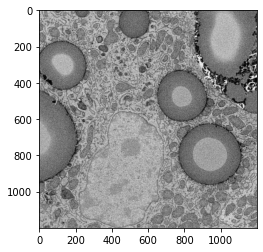

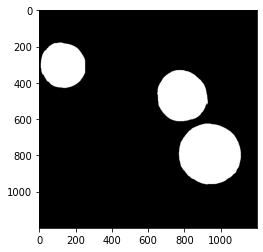

In [ ]:
img = mpimg.imread(train_df['images'][1211]) # read image
#img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
mask = mpimg.imread(train_df['masks'][1211])
#mask = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)
#mask = cv2.cvtColor(mask, cv2.COLOR_RGB2BGR)

plt.imshow(img, cmap='gray') # show the image
plt.show()
plt.imshow(mask, cmap='gray')
plt.show()

In [ ]:
img.shape, mask.shape

((1200, 1200, 3), (1200, 1200))

In [ ]:
np.max(img), np.min(img)

(1.0, 0.0)

In [ ]:
np.max(mask), np.min(mask)

(0.003921569, 0.0)

In [ ]:
mask[mask != 0] = 1
np.max(mask), np.min(mask)

(1.0, 0.0)

In [ ]:
np.where(mask==1)

(array([179, 179, 179, ..., 959, 959, 959]),
 array([111, 112, 113, ..., 924, 925, 926]))

In [ ]:
arr = ((mask - mask.min()) * (1/(mask.max() - mask.min()) * 255)).astype('uint8')

In [ ]:
np.max(arr), np.min(arr)

(255, 0)

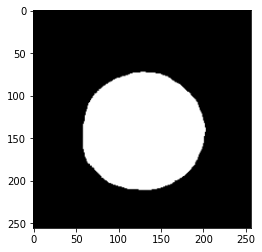

In [ ]:
plt.imshow(arr, cmap='gray')
plt.show()

In [ ]:
train_df

,images,masks
0,/content/drive/.shortcut-targets-by-id/1zwhXN2...,/content/drive/.shortcut-targets-by-id/1zwhXN2...
1,/content/drive/.shortcut-targets-by-id/1zwhXN2...,/content/drive/.shortcut-targets-by-id/1zwhXN2...
2,/content/drive/.shortcut-targets-by-id/1zwhXN2...,/content/drive/.shortcut-targets-by-id/1zwhXN2...
3,/content/drive/.shortcut-targets-by-id/1zwhXN2...,/content/drive/.shortcut-targets-by-id/1zwhXN2...
4,/content/drive/.shortcut-targets-by-id/1zwhXN2...,/content/drive/.shortcut-targets-by-id/1zwhXN2...
...,...,...
1684,/content/drive/.shortcut-targets-by-id/1zwhXN2...,/content/drive/.shortcut-targets-by-id/1zwhXN2...
1685,/content/drive/.shortcut-targets-by-id/1zwhXN2...,/content/drive/.shortcut-targets-by-id/1zwhXN2...
1686,/content/drive/.shortcut-targets-by-id/1zwhXN2...,/content/drive/.shortcut-targets-by-id/1zwhXN2...
1687,/content/drive/.shortcut-targets-by-id/1zwhXN2...,/content/drive/.shortcut-targets-by-id/1zwhXN2...


In [ ]:
# Drop masks column
#test_df = test_df.drop(columns=["masks"])

In [ ]:
test_df = test_df[:650]
test_df

,images,masks
0,/content/drive/.shortcut-targets-by-id/1zwhXN2...,/content/drive/.shortcut-targets-by-id/1zwhXN2...
1,/content/drive/.shortcut-targets-by-id/1zwhXN2...,/content/drive/.shortcut-targets-by-id/1zwhXN2...
2,/content/drive/.shortcut-targets-by-id/1zwhXN2...,/content/drive/.shortcut-targets-by-id/1zwhXN2...
3,/content/drive/.shortcut-targets-by-id/1zwhXN2...,/content/drive/.shortcut-targets-by-id/1zwhXN2...
4,/content/drive/.shortcut-targets-by-id/1zwhXN2...,/content/drive/.shortcut-targets-by-id/1zwhXN2...
...,...,...
645,/content/drive/.shortcut-targets-by-id/1zwhXN2...,/content/drive/.shortcut-targets-by-id/1zwhXN2...
646,/content/drive/.shortcut-targets-by-id/1zwhXN2...,/content/drive/.shortcut-targets-by-id/1zwhXN2...
647,/content/drive/.shortcut-targets-by-id/1zwhXN2...,/content/drive/.shortcut-targets-by-id/1zwhXN2...
648,/content/drive/.shortcut-targets-by-id/1zwhXN2...,/content/drive/.shortcut-targets-by-id/1zwhXN2...


# Image generator

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping
from keras import backend as keras

In [ ]:
# Data augmentation: define rotation angle, width and height shift, shear and zoom range, horizontal flip
data_gen_args = dict(rotation_range=0.5,
                    width_shift_range=0.05,
                    height_shift_range=0.05,
                    shear_range=0.05,
                    zoom_range=0.05,
                    horizontal_flip=True,
                    fill_mode='reflect',
                    rescale=1./255.
                    #validation_split=0.30
                    )


In [ ]:
# Define paramaters
batch_size = 10
target_size = (256,256)
seed = 1
train_path = None
image_folder = "images"
mask_folder = "masks"
image_color_mode = "grayscale"
mask_color_mode = "grayscale"
image_save_prefix  = "image"
mask_save_prefix  = "mask"
save_to_dir = "aug"
flag_multi_class = False
num_class = 2
save_to_dir = None


In [ ]:
# Create imageDateGenerator
# image_datagen = ImageDataGenerator(**data_gen_args)
# mask_datagen = ImageDataGenerator(**data_gen_args)
# image_generator = image_datagen.flow_from_directory(
#     train_path,
#     classes = [image_folder],
#     class_mode = None,
#     color_mode = image_color_mode,
#     target_size = target_size,
#     batch_size = batch_size,
#     save_to_dir = save_to_dir,
#     save_prefix  = image_save_prefix,
#     seed = seed)
# mask_generator = mask_datagen.flow_from_directory(
#     train_path,
#     classes = [mask_folder],
#     class_mode = None,
#     color_mode = mask_color_mode,
#     target_size = target_size,
#     batch_size = batch_size,
#     save_to_dir = save_to_dir,
#     save_prefix  = mask_save_prefix,
#     seed = seed)
# train_generator = zip(image_generator, mask_generator)


In [ ]:
# Using dataframe for image augmentation
# Define ImageDataGenerator for training images and masks

#data_gen_args = dict()
image_datagen = ImageDataGenerator(**data_gen_args)
mask_datagen = ImageDataGenerator(**data_gen_args)

image_generator = image_datagen.flow_from_dataframe(
dataframe = train_df,
directory = None,
x_col = "images",
y_col = None,
#subset = "training",
batch_size = batch_size,
seed = 1,
class_mode = None,
color_mode = image_color_mode,
target_size = target_size)


mask_generator = mask_datagen.flow_from_dataframe(
dataframe = train_df,
directory = None,
x_col = "masks",
y_col = None,
#subset = "validation",
batch_size = batch_size,
seed = 1,
class_mode = None,
color_mode = image_color_mode,
target_size = target_size)

train_generator = zip(image_generator, mask_generator)

# Define ImageDataGenerator for validation images and masks
'''
train_generator = image_datagen.flow_from_dataframe(
dataframe = train_df,
directory = None,
x_col = "images",
y_col = "masks",
#subset = "training",
batch_size = batch_size,
seed = 1,
class_mode = None,
color_mode = image_color_mode,
target_size = target_size)
'''




Found 1689 validated image filenames.
Found 1689 validated image filenames.


'\ntrain_generator = image_datagen.flow_from_dataframe(\ndataframe = train_df,\ndirectory = None,\nx_col = "images",\ny_col = "masks",\n#subset = "training",\nbatch_size = batch_size,\nseed = 1,\nclass_mode = None,\ncolor_mode = image_color_mode,\ntarget_size = target_size)\n'

In [ ]:
print(image_generator[0].shape, mask_generator[0].shape)

(10, 256, 256, 1) (10, 256, 256, 1)


In [ ]:
image_generator[54].shape

(30, 256, 256, 1)

In [ ]:
print(image_generator.n, image_generator.batch_size)
print(mask_generator.n, mask_generator.batch_size)

1689 10
1689 10


In [ ]:
train_step_size = image_generator.n // image_generator.batch_size
print(train_step_size)

168


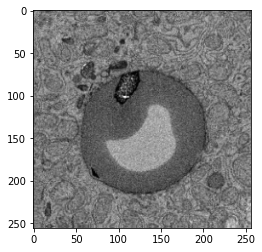

(256, 256)

In [ ]:
img = np.squeeze(next(image_generator)[0])
plt.imshow(img, cmap='gray') # show the image
plt.show()
img.shape

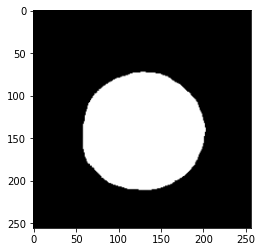

(256, 256)

In [ ]:
mask = np.squeeze(next(mask_generator)[0])
plt.imshow(mask, cmap='gray') # show the image
plt.show()
mask.shape

In [ ]:
np.max(mask), np.min(mask)

(0.003921569, 0.0)

In [ ]:
# Visualize the augmented images
# To fix: it's giving wrong images
def visualize_aug_images(image_gen):
  fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(15,15))

  for i in range(4):
    # convert to unsigned integers for plotting
    image = next(image_generator)[0].astype('uint8')
    mask = next(mask_generator)[0].astype('uint8')
    # # changing size from (1, 200, 200, 3) to (200, 200, 3) for plotting the image
    image = np.squeeze(image)
    mask = np.squeeze(mask)
    # only for colab; correct color
    #img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # plot raw pixel data
    ax[i][0].imshow(img, cmap='grap')
    ax[i].axis('off')

In [ ]:
def adjust_mask_data(img, mask):
  if(np.max(img) > 1):
    img = img / 255
  if(np.max(mask) > 1):
    mask = mask / 255
  mask[mask != 0] = 1
  return (img, mask)

In [ ]:
def get_generator(train_gen):
  for (img, mask) in train_gen:
    img, mask = adjust_mask_data(img, mask)
    yield (img, mask)

In [ ]:
# Create data generator for training set
myGenerator = get_generator(train_generator)

In [ ]:
for (img, mask) in myGenerator:
  print(img.shape, mask[0].shape)
  print(np.max(img[0]), np.min(img[0]),
        np.max(mask[0]), np.min(mask[0]))
  print(np.where(mask[0]==1))
  break

(10, 256, 256, 1) (256, 256, 1)
0.9846963 0.0047850106 1.0 0.0
(array([42, 42, 42, 42, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 44, 44, 44,
       44, 44, 44, 44, 44, 44, 44, 44, 44, 45, 45, 45, 45, 45, 45, 45, 45,
       45, 45, 45, 45, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46,
       47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 48, 48, 48, 48,
       48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 49, 49, 49, 49, 49, 49, 49,
       49, 49, 49, 49, 49, 49, 49, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50,
       50, 50, 50, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 52,
       52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 53, 53, 53, 53, 53, 53,
       53, 53, 53, 53, 54, 54, 54, 54, 54, 54, 54, 54, 55, 55, 55, 81, 81,
       81, 81, 81, 81, 81, 81, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82,
       83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 84, 84, 84, 84,
       84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 85, 85, 85, 85, 85, 85,
       85, 85, 85, 85, 85, 85, 85, 8

# U-Net model

In [ ]:
# Build U-Net model
def unet(pretrained_weights = None,input_size = (256,256,1)):
    inputs = Input(input_size)
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(inputs)
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool1)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool2)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool3)
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv4)
    drop4 = Dropout(0.5)(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)

    conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool4)
    conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv5)
    drop5 = Dropout(0.5)(conv5)

    up6 = Conv2D(512, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(drop5))
    merge6 = concatenate([drop4,up6], axis = 3)
    conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge6)
    conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv6)

    up7 = Conv2D(256, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv6))
    merge7 = concatenate([conv3,up7], axis = 3)
    conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge7)
    conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv7)

    up8 = Conv2D(128, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv7))
    merge8 = concatenate([conv2,up8], axis = 3)
    conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge8)
    conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv8)

    up9 = Conv2D(64, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv8))
    merge9 = concatenate([conv1,up9], axis = 3)
    conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge9)
    conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv9 = Conv2D(2, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv10 = Conv2D(1, 1, activation = 'sigmoid')(conv9)

    model = tf.keras.Model(inputs=inputs, outputs=conv10)

    model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-4), loss = 'binary_crossentropy', metrics = ['accuracy'])

    #model.summary()

    if(pretrained_weights):
      model.load_weights(pretrained_weights)

    return model

In [ ]:
model_file_location = os.path.join(os.getcwd(),"unet_lipid_s15.hdf5")

In [ ]:
model_file_location

'/content/drive/.shortcut-targets-by-id/1zwhXN2mfYzx7J-oIj8AGfpVnPk4Dvrr5/Colab Notebooks/UMII/Zooniverse/umii-fatchecker-dataset/unet_lipid_s15.hdf5'

In [ ]:

model = unet()
# Train the model
model_checkpoint = ModelCheckpoint(model_file_location, monitor='loss',verbose=1, save_best_only=True)



# Training

## w/o es

In [ ]:
# 50 samples
model.fit(train_generator,steps_per_epoch=train_step_size,epochs=5,callbacks=[model_checkpoint])


Epoch 1/5
5/5 [==============================] - ETA: 0s - loss: 0.2933 - accuracy: 0.7063
Epoch 1: loss improved from inf to 0.29329, saving model to /content/drive/.shortcut-targets-by-id/1zwhXN2mfYzx7J-oIj8AGfpVnPk4Dvrr5/Colab Notebooks/UMII/Zooniverse/umii-fatchecker-dataset/unet_lipid_50.hdf5
5/5 [==============================] - 7s 1s/step - loss: 0.2933 - accuracy: 0.7063
Epoch 2/5
5/5 [==============================] - ETA: 0s - loss: 0.0426 - accuracy: 0.8416
Epoch 2: loss improved from 0.29329 to 0.04255, saving model to /content/drive/.shortcut-targets-by-id/1zwhXN2mfYzx7J-oIj8AGfpVnPk4Dvrr5/Colab Notebooks/UMII/Zooniverse/umii-fatchecker-dataset/unet_lipid_50.hdf5
5/5 [==============================] - 3s 702ms/step - loss: 0.0426 - accuracy: 0.8416
Epoch 3/5
5/5 [==============================] - ETA: 0s - loss: 0.0231 - accuracy: 0.8397
Epoch 3: loss improved from 0.04255 to 0.02305, saving model to /content/drive/.shortcut-targets-by-id/1zwhXN2mfYzx7J-oIj8AGfpVnPk4Dvrr5

In [ ]:
# 
model.fit(train_generator,steps_per_epoch=train_step_size,epochs=5,callbacks=[model_checkpoint])


Epoch 1/5
168/168 [==============================] - ETA: 0s - loss: 0.0139 - accuracy: 0.9554
Epoch 1: loss improved from inf to 0.01391, saving model to /content/drive/.shortcut-targets-by-id/1zwhXN2mfYzx7J-oIj8AGfpVnPk4Dvrr5/Colab Notebooks/UMII/Zooniverse/umii-fatchecker-dataset/unet_lipid_50.hdf5
168/168 [==============================] - 970s 6s/step - loss: 0.0139 - accuracy: 0.9554
Epoch 2/5
168/168 [==============================] - ETA: 0s - loss: 0.0015 - accuracy: 0.9555
Epoch 2: loss improved from 0.01391 to 0.00154, saving model to /content/drive/.shortcut-targets-by-id/1zwhXN2mfYzx7J-oIj8AGfpVnPk4Dvrr5/Colab Notebooks/UMII/Zooniverse/umii-fatchecker-dataset/unet_lipid_50.hdf5
168/168 [==============================] - 95s 529ms/step - loss: 0.0015 - accuracy: 0.9555
Epoch 3/5
168/168 [==============================] - ETA: 0s - loss: 0.0015 - accuracy: 0.9558
Epoch 3: loss improved from 0.00154 to 0.00148, saving model to /content/drive/.shortcut-targets-by-id/1zwhXN2mfY

In [ ]:
# s15 fixed mask rescaled
model.fit(myGenerator,steps_per_epoch=train_step_size,epochs=5,callbacks=[model_checkpoint])


Epoch 1/5
168/168 [==============================] - ETA: 0s - loss: 0.1553 - accuracy: 0.9555 
Epoch 1: loss improved from inf to 0.15533, saving model to /content/drive/.shortcut-targets-by-id/1zwhXN2mfYzx7J-oIj8AGfpVnPk4Dvrr5/Colab Notebooks/UMII/Zooniverse/umii-fatchecker-dataset/unet_lipid_s15.hdf5
168/168 [==============================] - 2338s 14s/step - loss: 0.1553 - accuracy: 0.9555
Epoch 2/5
168/168 [==============================] - ETA: 0s - loss: 0.0929 - accuracy: 0.9647
Epoch 2: loss improved from 0.15533 to 0.09291, saving model to /content/drive/.shortcut-targets-by-id/1zwhXN2mfYzx7J-oIj8AGfpVnPk4Dvrr5/Colab Notebooks/UMII/Zooniverse/umii-fatchecker-dataset/unet_lipid_s15.hdf5
168/168 [==============================] - 76s 454ms/step - loss: 0.0929 - accuracy: 0.9647
Epoch 3/5
168/168 [==============================] - ETA: 0s - loss: 0.0715 - accuracy: 0.9762
Epoch 3: loss improved from 0.09291 to 0.07154, saving model to /content/drive/.shortcut-targets-by-id/1zwhX

## with early stopping

In [ ]:
es = EarlyStopping(monitor='loss', mode='min', verbose=1)
history = model.fit(train_generator,steps_per_epoch=train_step_size,epochs=20,callbacks=[es])


Epoch 1/20
56/56 [==============================] - 1076s 19s/step - loss: 0.6944 - accuracy: 0.9417
Epoch 2/20
56/56 [==============================] - 90s 1s/step - loss: 0.6890 - accuracy: 0.9552
Epoch 2: early stopping


In [ ]:
model.save(model_file_location)

In [ ]:
# plot training history
plt.plot(history.history['loss'], label='train')
plt.legend()
plt.show()

# Testing

In [ ]:
# Testing the model
# Define ImageDataGenerator for testing images
test_data_gen_args = dict(rescale=1./255.)
test_gen = ImageDataGenerator(**test_data_gen_args)
test_generator = test_gen.flow_from_dataframe(
dataframe = test_df,
directory = None,
x_col = "images",
y_col = None,
batch_size = batch_size,
seed = 1,
class_mode = None,
color_mode = image_color_mode,
target_size = target_size)



Found 650 validated image filenames.


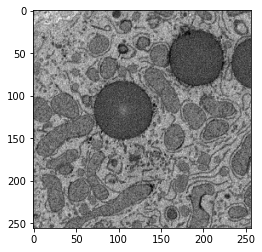

In [ ]:
img = np.squeeze(next(test_generator)[0])
plt.imshow(img, cmap='gray') # show the image
plt.show()

In [ ]:
img.shape

(256, 256)

In [ ]:
np.max(img), np.min(img)

(1.0, 0.007843138)

In [ ]:
test_step_size = test_generator.n // test_generator.batch_size
print(test_step_size)

65


In [ ]:
test_generator[23].shape

(7, 256, 256, 1)

In [ ]:
# Load the trained model
model_file_location = os.path.join(os.getcwd(),"unet_lipid_50.hdf5")
model = unet(model_file_location)


In [ ]:
def testGenerator(num_image = 10,target_size = (256,256),flag_multi_class = False,as_gray = True):
    for i in range(num_image):
        img = io.imread(test_df['images'][i], as_gray = as_gray)
        img = img / 255
        img = trans.resize(img,target_size)
        img = np.reshape(img,img.shape+(1,)) if (not flag_multi_class) else img
        img = np.reshape(img,(1,)+img.shape)
        yield img

In [ ]:
testGen = testGenerator()


In [ ]:
# test the model and save it in results; results is a numpy array
test_generator.reset()
results_2 = model.predict(test_generator, steps=test_step_size, verbose=1)

65/65 [==============================] - 17s 259ms/step


In [ ]:
test1 = io.imread(test_df['images'][0], as_gray = True)
test1 = test1 / 255
print(test1.shape)
test1 = trans.resize(test1,target_size)
test1 = np.reshape(test1,test1.shape+(1,))
test1 = np.reshape(test1,(1,)+test1.shape)
result1 = model.predict(test1, 1, verbose=1)

(825, 825)
1/1 [==============================] - 0s 19ms/step


In [ ]:
np.max(results), np.min(results)

(0.5061338, 1.2074868e-08)

In [ ]:
results.shape

(650, 256, 256, 1)

In [ ]:
r1 = results[0][:,:,0]
r1.shape

(256, 256)

In [ ]:
np.max(r1), np.min(r1)

(0.5061338, 2.1337951e-07)

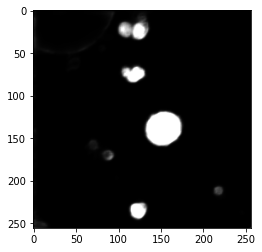

In [ ]:
plt.imshow(r1, cmap='gray')
plt.show()

In [ ]:
arr = ((r1 - r1.min()) * (1/(r1.max() - r1.min()) * 255)).astype('uint8')
np.max(arr), np.min(arr)

(255, 0)

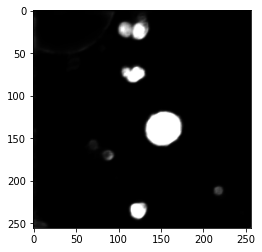

In [ ]:
plt.imshow(arr, cmap='gray')
plt.show()

In [ ]:

def show_test_image_pairs(results, i):
  mask_test = results[i][:,:,0]
  mask_actual = mpimg.imread(test_df['masks'][i])
  img_actual = mpimg.imread(test_df['images'][i])
  fig, ax = plt.subplots(nrows=1, ncols=3)
  ax[0].imshow(mask_test, cmap='gray')
  ax[1].imshow(mask_actual, cmap='gray')
  ax[2].imshow(img_actual, cmap='gray')
  plt.show()


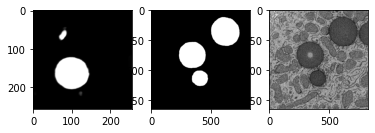

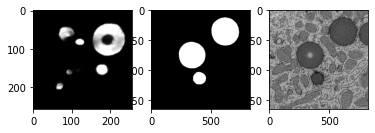

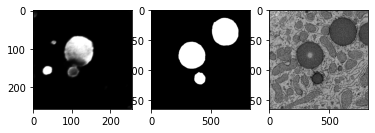

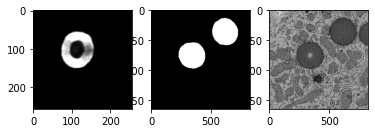

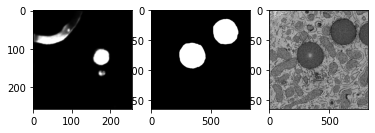

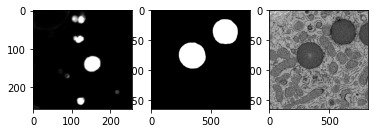

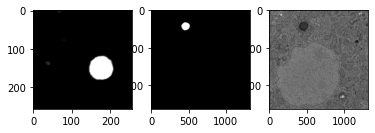

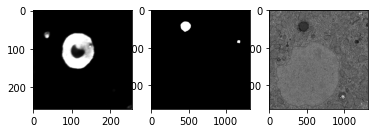

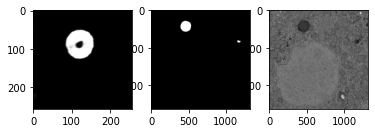

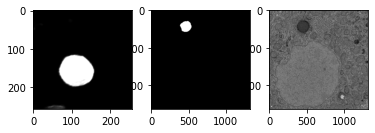

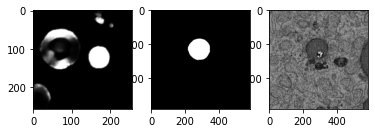

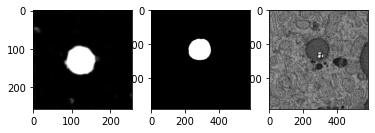

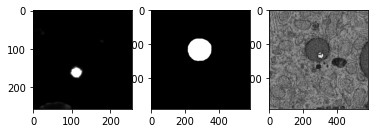

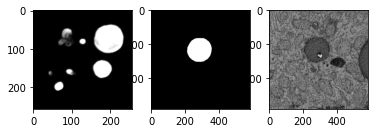

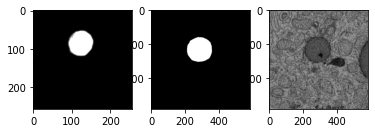

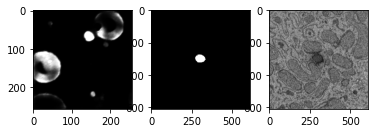

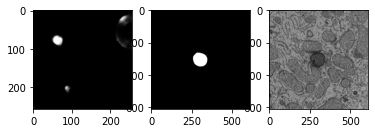

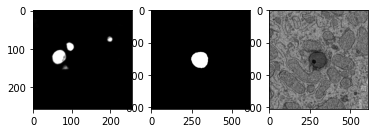

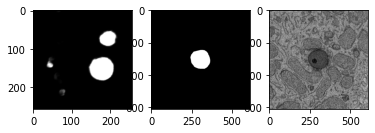

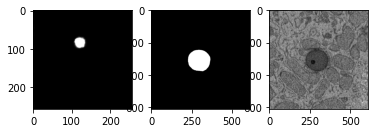

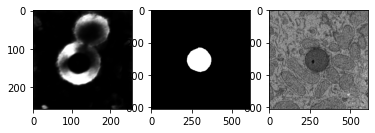

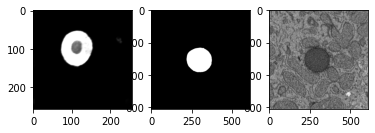

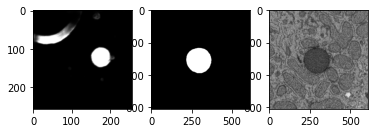

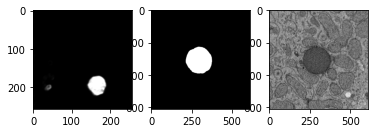

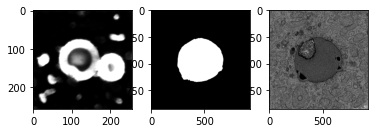

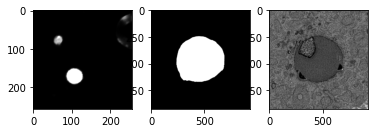

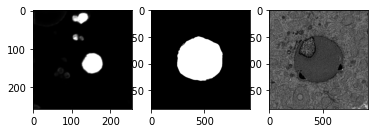

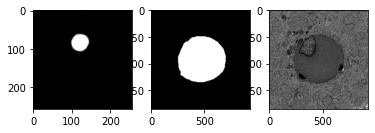

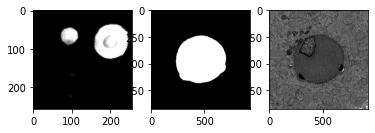

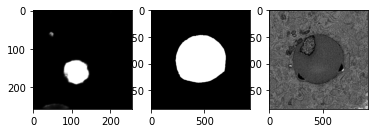

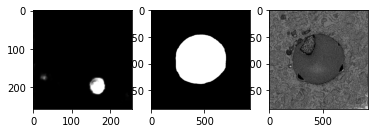

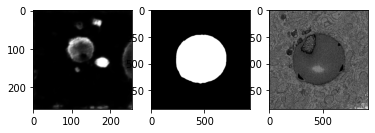

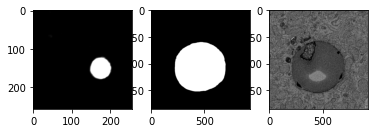

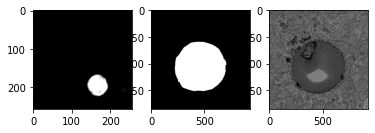

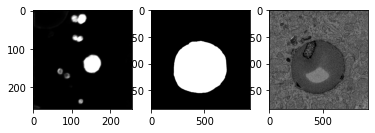

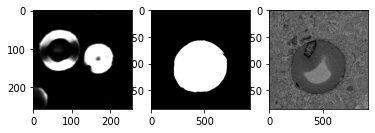

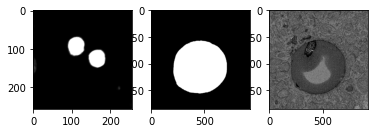

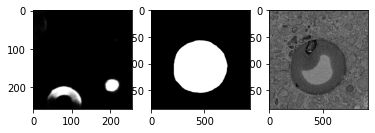

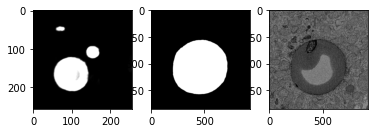

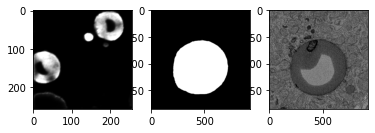

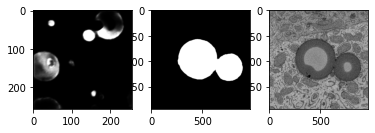

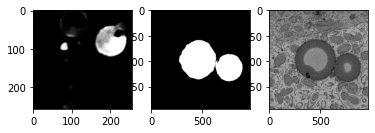

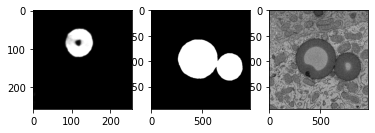

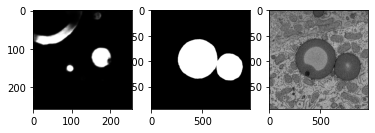

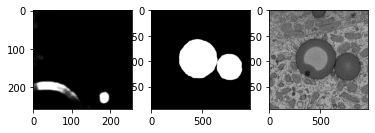

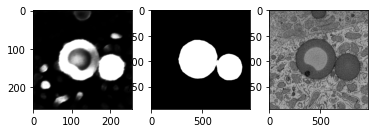

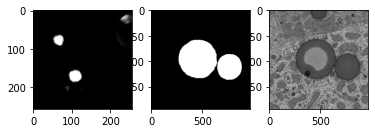

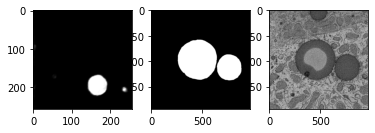

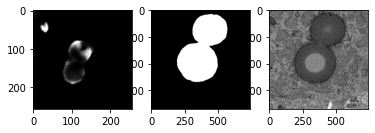

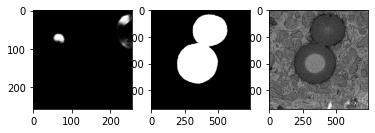

In [ ]:
for i in range(50):
  show_test_image_pairs(results_2, i)

In [ ]:
image_stacks = load_json_file("image_stacks")["id"]


0


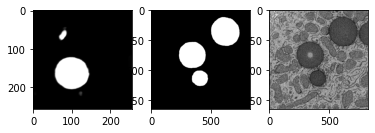

6


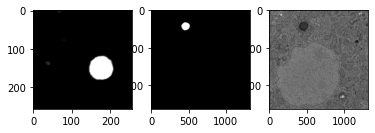

10


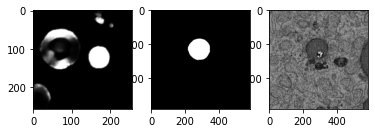

60


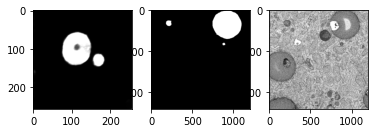

85


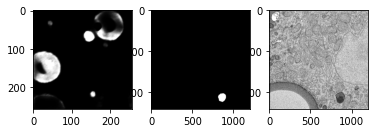

88


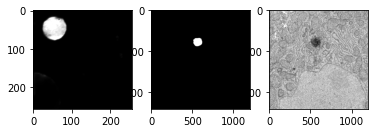

148


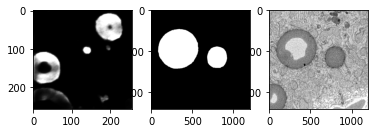

337


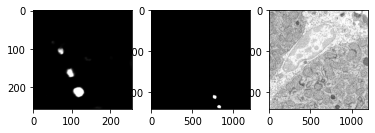

451


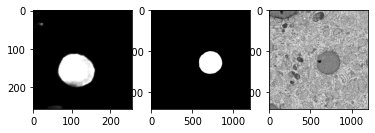

472


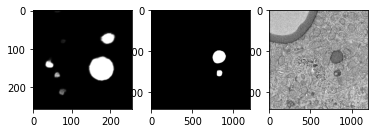

502


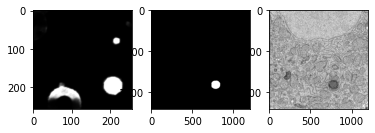

In [ ]:
i = 0
while(image_stacks[i][0] < len(results_2)):
  n = image_stacks[i][0]
  print(n)
  show_test_image_pairs(results_2, n)
  i += 1

In [ ]:
from skimage import img_as_float
import imageio
import skimage.io as io
import numpy as np 
import glob
import skimage.transform as trans
import matplotlib.pyplot as plt
import cv2

Sky = [128,128,128]
Building = [128,0,0]
Pole = [192,192,128]
Road = [128,64,128]
Pavement = [60,40,222]
Tree = [128,128,0]
SignSymbol = [192,128,128]
Fence = [64,64,128]
Car = [64,0,128]
Pedestrian = [64,64,0]
Bicyclist = [0,128,192]
Unlabelled = [0,0,0]

COLOR_DICT = np.array([Sky, Building, Pole, Road, Pavement,
                          Tree, SignSymbol, Fence, Car, Pedestrian, Bicyclist, Unlabelled])


def testGenerator(test_set,target_size = (256,256),flag_multi_class = False,as_gray = True):
    for i in range(30): #(len(test_set['images'])):
        img = io.imread(test_set['images'][i],as_gray = as_gray)
        #img = img / 255
        img = trans.resize(img,target_size)
        img = np.reshape(img,img.shape+(1,)) if (not flag_multi_class) else img
        img = np.reshape(img,(1,)+img.shape)
        yield img

def labelVisualize(num_class,color_dict,img):
    img = img[:,:,0] if len(img.shape) == 3 else img
    img_out = np.zeros(img.shape + (3,))
    for i in range(num_class):
        img_out[img == i,:] = color_dict[i]
    return img_out

def saveResult(save_path,npyfile,flag_multi_class = False,num_class = 2):
    for i,item in enumerate(npyfile):
        img = labelVisualize(num_class,COLOR_DICT,item) if flag_multi_class else item[:,:,0]
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.imsave(os.path.join(save_path, "%d_predict.png"%i), img)


In [ ]:
# Save the result images in google drive
saveResult("data/test_result", results)

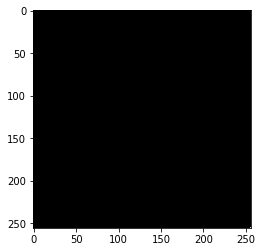

In [ ]:
plt.imshow(img_test, cmap='gray')
#plt.imsave("test.png", img_test)
plt.show()

In [ ]:
# Visualize some of the test image results
image_path = "data/test_result"

for i in range(5):
  show_image(os.path.join(image_path,"%d_predict.png"%i))

In [ ]:
import json
# save values in json file
def save_as_json(file_list, file_name):
  myfile = open( file_name + ".json", "w")
  json.dump(file_list, myfile, indent=6)
  myfile.close()

# load saved nmi_values list
def load_json_file(file_name):
  myfile = open(file_name + ".json")
  loaded_file = json.load(myfile)
  return loaded_file

In [ ]:
file_list = results_2.tolist()
type(file_list)
model_result = {"id": file_list}
save_as_json(model_result, "model_result_2")
#loaded_results = load_json_file("model_result")